## C: Regularization Parameter
Intuition:

C determines the trade-off between achieving a wide margin and ensuring that most of the training data is classified correctly.
#### A smaller value of C creates a wider margin, which might misclassify more data points (higher bias, lower variance).

#### A larger value of C aims to classify all training examples correctly by selecting a smaller margin (lower bias, higher variance).

In [1]:
def plot_decision_function(model, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
    return ax


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Load your data
# Assuming you have already loaded your data into a pandas DataFrame called 'data'
# Provided data
data = pd.read_csv('student_data.csv')
# Create a dataframe
df = pd.DataFrame(data)
# Prepare the data for training
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# 1. Fit a Support Vector Machine model with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)

# 2. Fit a Support Vector Machine model with RBF kernel using grid search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}
svm_rbf = SVC(kernel='rbf')
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5)
grid_search.fit(X, y)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)



Best parameters found:  {'C': 1, 'gamma': 0.1}
Best score:  0.93


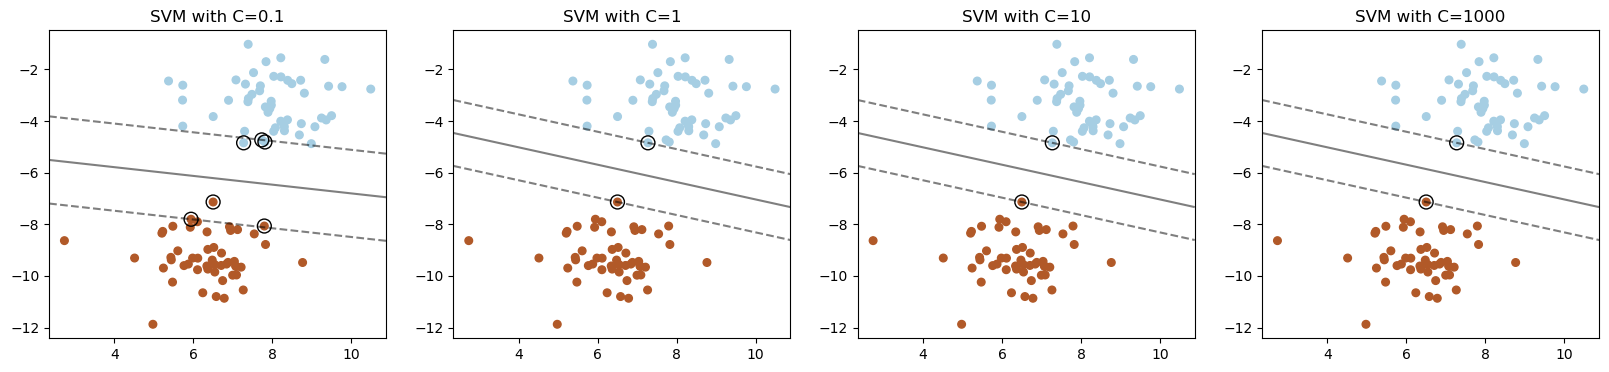

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Create a simple dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# Train SVMs with different C values
C_values = [0.1, 1, 10, 1000]
models = [SVC(kernel='linear', C=C).fit(X, y) for C in C_values]

# Plot the decision boundaries for each model
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

for model, ax, C in zip(models, axes, C_values):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    
    # plot the decision function
    ax = plot_decision_function(model, ax)
    
    ax.set_title(f'SVM with C={C}')

plt.show()


## gamma: RBF Kernel Coefficient
For RBF Kernel:
gamma defines how far the influence of a single training example reaches.
Low values mean far reach, and high values mean close reach.
A small gamma will produce a more flexible decision boundary, whereas a large gamma will produce a more rigid boundary (can lead to overfitting).

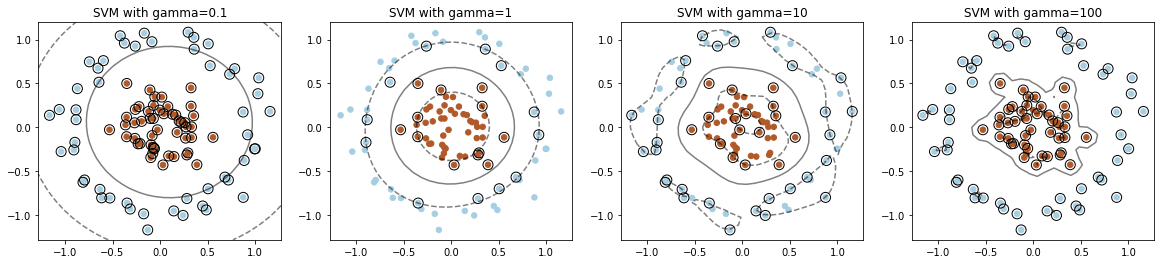

In [14]:
# Generate moon shaped data
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Generate donut shaped data
X, y = make_circles(n_samples=100, factor=0.3, noise=0.1, random_state=42)


gamma_values = [0.1, 1, 10, 100]
models = [SVC(kernel='rbf', gamma=gamma).fit(X, y) for gamma in gamma_values]

# Plot the decision boundaries for each model
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

for model, ax, gamma in zip(models, axes, gamma_values):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    
    # plot the decision function
    ax = plot_decision_function(model, ax)
    
    ax.set_title(f'SVM with gamma={gamma}')

plt.show()
